<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/ESAA_1115_Week11_Fri_Session_regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [2]:
# 데이터 로드
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/ESAA/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

Mounted at /content/drive


## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [3]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [4]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [5]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge # 릿지모델 생성
from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.metrics import mean_squared_error # 평가

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [7]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha = 0.3)

#예측값 구하기
ridge.fit(X_train,y_train)
pred = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
age = pred + 1.5
print(age)

#MSE와 RMSE구하기
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
print(mse,rmse)

[14.7338535  10.6097756  11.96922045 ... 10.92010051 20.07580883
 12.45775586]
5.013158686100955 2.239008415817358


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [8]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [10]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
  ridge = Ridge(alpha = alpha)

  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse = cross_val_score(ridge, X_train,y_train,scoring = 'neg_mean_squared_error', cv = 5)
  rmse = np.sqrt(-1*neg_mse)
  average_rmse = np.mean(rmse)
  print('alpha: {0}, RMSE: {1}'.format(alpha,average_rmse)) ### alpha 0.1일때 제일 좋음

alpha: 0, RMSE: 2.192206313608826
alpha: 0.1, RMSE: 2.188965384248428
alpha: 1, RMSE: 2.192043096482087
alpha: 10, RMSE: 2.3359968157278956
alpha: 100, RMSE: 2.604249483579334


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [11]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [13]:
#모델 생성 및 훈련
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

#예측값 구하기
pred = xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
age = pred + 1.5
print(age)

#MSE와 RMSE 구하기
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
print(mse,rmse)

[15.926207 10.032749 11.0244   ... 11.543487 17.091515 14.133587]
5.454935396150499 2.335580312502762


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

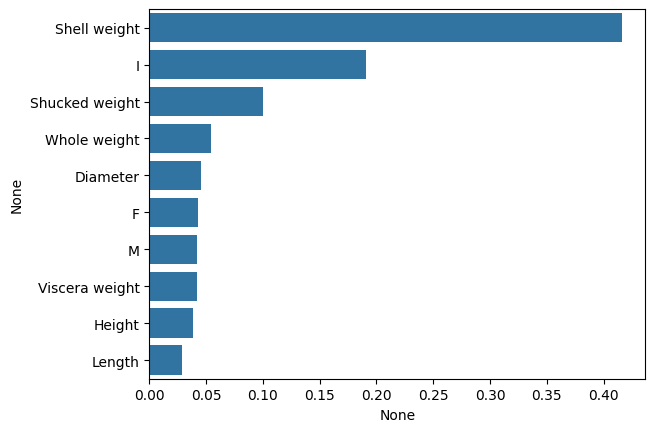

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

feature_series = pd.Series(data = xgb_reg.feature_importances_, index = data.columns )
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x= feature_series, y=feature_series.index)
plt.show()

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [14]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [15]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [16]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [19]:
lr = LogisticRegression(solver = 'liblinear') # 다중 분류에 적합한 알고리즘
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [20]:
#기울기
lr.coef_

array([[-8.27410128e-01,  9.85143596e-01,  7.71932869e-01,
        -5.45958718e-01,  6.48908005e-03,  1.36918111e-01,
         1.30022535e+00,  9.52833220e-02, -3.34958730e-01,
        -1.13866462e-01, -1.30280169e-01,  6.34520383e-01,
         1.57243990e-02],
       [ 8.98771532e-01, -1.29900044e+00, -5.10526822e-01,
         2.88868503e-01, -1.45314425e-02,  3.17384954e-01,
         1.38925283e-01,  2.65613579e-01,  7.21303080e-01,
        -1.50841936e+00,  7.14087212e-01,  3.38160421e-01,
        -1.31229359e-02],
       [-3.89427714e-01,  6.27036051e-01,  1.33494253e-02,
         1.00444553e-01,  3.44156795e-02, -7.87534169e-01,
        -1.45192586e+00, -1.41907135e-01, -7.08052940e-01,
         9.24164423e-01, -5.05708096e-01, -1.15695165e+00,
        -1.49464842e-04]])

In [21]:
#절편
lr.intercept_

array([-0.24594674,  0.27926769, -0.08219095])

3-3) 모델의 정확도를 구하세요.

In [22]:
#모델의 예측값 구하기
pred = lr.predict(x_test)

#모델의 정확도 구하기
accuracy = metrics.accuracy_score(y_test,pred)
print(accuracy)

0.9444444444444444
